<a href="https://colab.research.google.com/github/abyzovlab/CNVpytor/blob/master/examples/Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This article demostrates about the installation of CNVpytor and two usage example with CEPH trio dataset available in the google cloud.


***Links***
*   CNVpytor: https://github.com/abyzovlab/CNVpytor
*   Example dataset: https://console.cloud.google.com/storage/browser/genomics-public-data/platinum-genomes
*   Related: https://googlegenomics.readthedocs.io/en/latest/use_cases/discover_public_data/platinum_genomes.html

# Table of Content

---


*   [1. Installation of CNVpytor](#scrollTo=EmSgH5ajgw6d)
*   [2. Integration of Publicly available google cloud datasets](#scrollTo=SkMoyLV4jdJo)
*   [3. CNVpytor run on example datasets](scrollTo=v4blh9SrlDZp)
 * [3.1 Alignment file as input for read depth analysis](#scrollTo=-0mffW8Z0mEt)
         *   [3.1.1 Using command line console](#scrollTo=2znYwACv1anm)
         *   [3.1.2 Using python environment](#scrollTo=OI5Nfduwj6Im)
 *   [3.2 Variant file as input for BAF analysis](#scrollTo=TsRzzeUDRNoL)
         *   [3.2.1 Using command line console](#scrollTo=VfDXg11Ej0S3)
         *   [3.2.2 Using python environment](#scrollTo=OI5Nfduwj6Im)
*   [4. Visualization of results](#scrollTo=gS-kYadbl4Hv)
 * [4.1 View metadata from pytor file](#scrollTo=x1FxNpirMaBF)
 * [4.2 View content of the pytor file](#scrollTo=uFDnMUmyMini)
 * [4.3 Available configuration options](#scrollTo=j0Q09_J9PBVt)
 * [4.4 Single Sample: Genome Wide view](#scrollTo=UsN-1s5lOdE1)
 * [4.5 Single Sample: Region wide view](#scrollTo=LoN5UFX0OtLH)
 * [4.6 Read Depth Manhattan plot](#scrollTo=dYh1NSFnSA-6)

* [5. Export of CNVpytor results](#scrollTo=acT_rkNvrx81)



---




## 1. Installation of CNVpytor
CNVpytor is fully written in python, which makes the instllation much easier. Even in google colab, one can easily install, run and get all the required results and save it to their own system for future use.




### 1.1 Install directly from github
Steps to install directly from github
```
git clone https://github.com/abyzovlab/CNVpytor.git
python setup.py install
```

### 1.2 Using PIP install
```
pip install cnvpytor
cnvpytor -download
```

### 1.3. PIP install directly from github
```
pip install git+https://github.com/abyzovlab/CNVpytor.git
```

In this demostration, the pip installation directly from github is followed  as it has the latest features.

In [ ]:
# PIP install directly from github
!pip install git+https://github.com/abyzovlab/CNVpytor.git

  Cloning https://github.com/abyzovlab/CNVpytor.git to /tmp/pip-req-build-q065xqnr
  Running command git clone -q https://github.com/abyzovlab/CNVpytor.git /tmp/pip-req-build-q065xqnr
     |████████████████████████████████| 286kB 2.7MB/s 
     |████████████████████████████████| 10.0MB 227kB/s 
  Created wheel for CNVpytor: filename=CNVpytor-1.0-cp36-none-any.whl size=68298386 sha256=1fc4f8947a899e2dc77972e3dd9c32f75ee7a49ec7775196d8508ccce87d21a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-21w8kzs0/wheels/a4/02/bb/f16f595b6aad019289d21b7c776ff000c0cb1f0318d38bc2ed
Successfully built CNVpytor




---


##  2. Integration of Publicly available google cloud datasets
In the google cloud, there are some public datasets available which can be easily mounted to any existing google colab. One can use that without downloading the dataset. Here is the [link](https://console.cloud.google.com/storage/browser/genomics-public-data/platinum-genomes) for the datasets.

There are basically four steps to integrate
*   Google account authentication
*   Install gcsfuse
*   Create a directory
*   Mount a CEPH datasets

Here we have ingreated the whole genome datasets and variant files.Let's integrate the above dataset to this environment.



**Step1**: Google account authentication may required. 

In [ ]:
# google account authentication may required. 
from google.colab import auth
auth.authenticate_user()

**Step2**: Install gccfuse

In [ ]:
# install gcsfuse
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  22517      0 --:--:-- --:--:-- --:--:-- 22517
OK
103 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 103 not upgraded.
Need to get 4,278 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.30.0_amd64.deb ...
Unpacking gcsfuse (0.30.0) ...
Setting up gcsfuse (0.30.0) ...


**Step3**: Create directory for WGS and VCF files

In [ ]:
# Create a directory for WGS data
!mkdir trio_data_bam


In [ ]:
# Create Directory for VCF files
!mkdir trio_data_vcf

**Step4**: Mount CEPH datasets

In [ ]:
# Mount CEPH bam files to the trio_data_bam folder
!gcsfuse --only-dir platinum-genomes/bam genomics-public-data /content/trio_data_bam

Using mount point: /content/trio_data_bam
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.


In [ ]:
# Mount CEPH vcf files to the trio_data_vcf folder
!gcsfuse --only-dir platinum-genomes/vcf genomics-public-data /content/trio_data_vcf

Using mount point: /content/trio_data_vcf
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.


Now we have successfuly mounted Google cloud datasets. Lets run CNVpytor now

## 3. CNVpytor run using example datasets
CNVpytor takes both alignmnet file and variant file as input. Depending on the input type, the steps vary. One can use both or any one of the input file. 

There are two ways to run CNVpytor.
*   Using command line console
*   Using python environment
Here we are going to show both the example using two different dataset and compare their results



### 3.1 Alignment file as input for Read depth analysis

The steps are as follows:

*   Read the Read Depth data
*   Create RD histogram
*   Partition step
*   Call step

#### 3.1.1 Using command line console


In [ ]:

# RD Step
!cnvpytor -root NA12877.pytor -rd /content/trio_data_bam/NA12877_S1.bam

# Data_link
# gs://genomics-public-data/platinum-genomes/bam/NA12877_S1.bam

2020-07-21 23:11:42,320 - cnvpytor.bam - INFO - File: /content/trio_data_bam/NA12877_S1.bam successfully open
2020-07-21 23:11:42,320 - cnvpytor.bam - INFO - Detected reference genome: hg19
2020-07-21 23:11:42,326 - cnvpytor.pool - INFO - Parallel processing using 2 cores
2020-07-21 23:11:42,338 - cnvpytor.root - INFO - Reading data for chromosome chrM with length 16571
2020-07-21 23:11:42,339 - cnvpytor.root - INFO - Reading data for chromosome chr1 with length 249250621
2020-07-21 23:12:03,995 - cnvpytor.root - INFO - Reading data for chromosome chr2 with length 243199373
2020-07-21 23:33:22,656 - cnvpytor.root - INFO - Reading data for chromosome chr3 with length 198022430
2020-07-21 23:34:22,293 - cnvpytor.root - INFO - Reading data for chromosome chr4 with length 191154276
2020-07-21 23:51:30,953 - cnvpytor.root - INFO - Reading data for chromosome chr5 with length 180915260
2020-07-21 23:51:57,387 - cnvpytor.root - INFO - Reading data for chromosome chr6 with length 171115067
202

In [ ]:
# Histogram Step using bin size-100000
!cnvpytor -root NA12877.pytor -his 100000

2020-07-22 01:39:35,542 - cnvpytor.root - INFO - Calculating histograms using bin size 100000 for chromosome 'chrM'.
2020-07-22 01:39:35,575 - cnvpytor.root - INFO - Chromosome 'chrM' bin size 100000 stat - RD parity distribution gaussian fit:  2016000.00 +- 0.00
2020-07-22 01:39:35,575 - cnvpytor.root - INFO - Chromosome 'chrM' bin size 100000 stat - RD unique distribution gaussian fit:  1989792.00 +- 0.00
2020-07-22 01:39:35,575 - cnvpytor.root - INFO - Calculating histograms using bin size 100000 for chromosome 'chr1'.
2020-07-22 01:39:35,824 - cnvpytor.root - INFO - Chromosome 'chr1' bin size 100000 stat - RD parity distribution gaussian fit:  54450.67 +- 2146.76
2020-07-22 01:39:35,824 - cnvpytor.root - INFO - Chromosome 'chr1' bin size 100000 stat - RD unique distribution gaussian fit:  54055.06 +- 2159.76
2020-07-22 01:39:35,824 - cnvpytor.root - INFO - Calculating histograms using bin size 100000 for chromosome 'chr2'.
2020-07-22 01:39:35,976 - cnvpytor.root - INFO - Chromosome

In [ ]:
# Partition Step
!cnvpytor -root NA12877.pytor -partition 100000

2020-07-22 01:59:55,255 - cnvpytor.root - INFO - Calculating partition using bin size 100000 for chromosome 'chr1'.
2020-07-22 01:59:56,982 - cnvpytor.root - INFO - Calculating partition using bin size 100000 for chromosome 'chr2'.
2020-07-22 01:59:58,675 - cnvpytor.root - INFO - Calculating partition using bin size 100000 for chromosome 'chr3'.
2020-07-22 02:00:00,101 - cnvpytor.root - INFO - Calculating partition using bin size 100000 for chromosome 'chr4'.
2020-07-22 02:00:01,548 - cnvpytor.root - INFO - Calculating partition using bin size 100000 for chromosome 'chr5'.
2020-07-22 02:00:02,961 - cnvpytor.root - INFO - Calculating partition using bin size 100000 for chromosome 'chr6'.
2020-07-22 02:00:04,409 - cnvpytor.root - INFO - Calculating partition using bin size 100000 for chromosome 'chr7'.
2020-07-22 02:00:05,770 - cnvpytor.root - INFO - Calculating partition using bin size 100000 for chromosome 'chr8'.
2020-07-22 02:00:07,050 - cnvpytor.root - INFO - Calculating partition u

In [ ]:
# CALL step 
!cnvpytor -root NA12877.pytor -call 100000

deletion	chr1:100001-500000	400000	0.6377	3.758628e+01	1.773045e-45	3.758628e+01	1.773045e-45	0.8042	0.3216	
deletion	chr1:3800001-4000000	200000	0.2455	8.511589e+02	0.000000e+00	8.511589e+02	0.000000e+00	0.0056	0.7500	
deletion	chr1:13000001-13800000	800000	0.4943	1.114888e+00	3.070325e-04	1.114888e+00	3.070325e-04	0.7190	0.2500	
deletion	chr1:29800001-30100000	300000	0.5038	6.585198e+02	0.000000e+00	6.585198e+02	0.000000e+00	0.0003	0.5000	
deletion	chr1:120900001-142500000	21600000	0.1814	9.112777e-06	2.871000e+09	9.112777e-06	2.871000e+09	0.1802	0.9798	
deletion	chr1:143600001-143900000	300000	0.5178	3.957738e+02	3.905792e-13	3.957738e+02	3.905792e-13	0.6620	0.4818	
deletion	chr1:145800001-146300000	500000	0.5397	1.471721e+01	0.000000e+00	1.471721e+01	0.000000e+00	0.8111	0.2934	
deletion	chr1:149400001-149600000	200000	0.5194	4.745590e+02	0.000000e+00	4.745590e+02	0.000000e+00	0.6869	0.2500	
deletion	chr2:5000001-5200000	200000	0.4798	1.783462e+03	0.000000e+00	1.783462e+03	0.000000e

#### 3.1.2 Using python console

In [ ]:
import cnvpytor

To create new root class

In [ ]:
pytor_file = "NA12877.pytor"
app = cnvpytor.Root(pytor_file, create=True)


To import RD signal from bam file

In [ ]:
bam_file = "/content/trio_data_bam/NA12877_S1.bam"
bam_file_list = [bam_file]
app.rd(bam_file_list)

Calculate Histogram 

In [ ]:
bin_list = [10000, 100000]
app.calculate_histograms(bin_list)

Calculate partition for the same bins

In [ ]:
app.partition(bin_list)

Calls 

In [ ]:
calls=app.call(bin_list)

Access the calls

In [ ]:
for bin_size in calls:
    for call in calls[bin_size]:
        print(("{:13}{:>5}{:10}{:10}{:10}{:15.2f}{:15.2e}{:15.2e}").format(*tuple(call)))

### 3.2 Using Variant file as input BAF analysis

For SNP call the steps are
*   Read the variant file
*   mask snp
*   Create BAF histogram
*   Call BAF


#### 3.2.1 Using command line console

In [ ]:
# Read VCF data
!cnvpytor -root NA12877.pytor -vcf /content/trio_data_vcf/NA12877_S1.genome.vcf


2020-07-22 02:12:37,879 - cnvpytor.vcf - INFO - File: /content/trio_data_vcf/NA12877_S1.genome.vcf successfully open
2020-07-22 02:12:57,857 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr1'.
2020-07-22 02:12:58,122 - cnvpytor.io - INFO - Detecting RD data in file 'NA12877.pytor' for the same chromosome.
2020-07-22 02:13:19,006 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr2'.
2020-07-22 02:13:19,297 - cnvpytor.io - INFO - Detecting RD data in file 'NA12877.pytor' for the same chromosome.
2020-07-22 02:13:36,045 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr3'.
2020-07-22 02:13:36,280 - cnvpytor.io - INFO - Detecting RD data in file 'NA12877.pytor' for the same chromosome.
2020-07-22 02:13:53,488 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr4'.
2020-07-22 02:13:53,733 - cnvpytor.io - INFO - Detecting RD data in file 'NA12877.pytor' for the same chromosome.
2020-07-22 02:14:08,736 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr5

In [ ]:
# Pileup step
!cnvpytor -root NA12877.pytor -pileup /content/trio_data_bam/NA12877_S1.bam

2020-07-22 02:23:49,550 - cnvpytor.root - INFO - Decompressing and setting all SNP counts to zero for chromosome 'chr1'.
2020-07-22 02:23:53,858 - cnvpytor.root - INFO - Decompressing and setting all SNP counts to zero for chromosome 'chr2'.
2020-07-22 02:23:58,329 - cnvpytor.root - INFO - Decompressing and setting all SNP counts to zero for chromosome 'chr3'.
2020-07-22 02:24:02,196 - cnvpytor.root - INFO - Decompressing and setting all SNP counts to zero for chromosome 'chr4'.
2020-07-22 02:24:06,318 - cnvpytor.root - INFO - Decompressing and setting all SNP counts to zero for chromosome 'chr5'.
2020-07-22 02:24:09,698 - cnvpytor.root - INFO - Decompressing and setting all SNP counts to zero for chromosome 'chr6'.
2020-07-22 02:24:13,145 - cnvpytor.root - INFO - Decompressing and setting all SNP counts to zero for chromosome 'chr7'.
2020-07-22 02:24:16,200 - cnvpytor.root - INFO - Decompressing and setting all SNP counts to zero for chromosome 'chr8'.
2020-07-22 02:24:19,273 - cnvpyt

In [ ]:
# Mask SNP
!cnvpytor -root NA12877.pytor -mask_snps

2020-07-22 03:19:12,138 - cnvpytor.root - INFO - Masking SNP data for chromosome 'chr1'.
2020-07-22 03:19:17,115 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr1'.
2020-07-22 03:19:18,134 - cnvpytor.root - INFO - Masking SNP data for chromosome 'chr2'.
2020-07-22 03:19:23,166 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr2'.
2020-07-22 03:19:24,223 - cnvpytor.root - INFO - Masking SNP data for chromosome 'chr3'.
2020-07-22 03:19:28,577 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr3'.
2020-07-22 03:19:29,441 - cnvpytor.root - INFO - Masking SNP data for chromosome 'chr4'.
2020-07-22 03:19:34,011 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr4'.
2020-07-22 03:19:34,993 - cnvpytor.root - INFO - Masking SNP data for chromosome 'chr5'.
2020-07-22 03:19:38,820 - cnvpytor.io - INFO - Saving SNP data for chromosome 'chr5'.
2020-07-22 03:19:39,538 - cnvpytor.root - INFO - Masking SNP data for chromosome 'chr6'.
2020-07-22 03:19:43,398 - cnvpytor.i

In [ ]:
# baf step
!cnvpytor -root NA12877.pytor -baf 100000

2020-07-22 03:24:57,264 - cnvpytor.root - INFO - Calculating BAF histograms for chromosome 'chr1'.
2020-07-22 03:25:15,873 - cnvpytor.root - INFO - Saving BAF histograms with bin size 100000 for chromosome 'chr1'.
2020-07-22 03:25:15,990 - cnvpytor.root - INFO - Calculating BAF histograms for chromosome 'chr2'.
2020-07-22 03:25:35,870 - cnvpytor.root - INFO - Saving BAF histograms with bin size 100000 for chromosome 'chr2'.
2020-07-22 03:25:35,979 - cnvpytor.root - INFO - Calculating BAF histograms for chromosome 'chr3'.
2020-07-22 03:25:53,668 - cnvpytor.root - INFO - Saving BAF histograms with bin size 100000 for chromosome 'chr3'.
2020-07-22 03:25:53,757 - cnvpytor.root - INFO - Calculating BAF histograms for chromosome 'chr4'.
2020-07-22 03:26:12,264 - cnvpytor.root - INFO - Saving BAF histograms with bin size 100000 for chromosome 'chr4'.
2020-07-22 03:26:12,373 - cnvpytor.root - INFO - Calculating BAF histograms for chromosome 'chr5'.
2020-07-22 03:26:28,196 - cnvpytor.root - INF

In [ ]:
# baf call step
!cnvpytor -root NA12877.pytor -call baf 100000

chr1:800001-248600000 247800000 100000 1728 0.0 1.0
chr1:17200001-17500000 300000 100000 2 0.125 4.026793518323269e-05
chr1:94800001-94900000 100000 100000 1 0.075 0.06197335807012843
chr1:163700001-163800000 100000 100000 1 0.075 0.13126064503083054
chr1:215600001-215700000 100000 100000 1 0.1 0.05880504648188138
chr1:217700001-217800000 100000 100000 1 0.095 0.059153304374478265
chr2:100001-243000000 242900000 100000 1832 0.0 1.0
chr2:33500001-33600000 100000 100000 1 0.07 0.06210491362900817
chr2:37900001-38000000 100000 100000 1 0.105 1.2239484108393161e-12
chr2:38000001-38100000 100000 100000 1 0.06 0.001353356984603748
chr2:126600001-126700000 100000 100000 1 0.06 0.08875513570993471
chr2:206100001-206200000 100000 100000 1 0.07 0.18047130150766985
chr3:1-197500000 197500000 100000 1591 0.0 1.0
chr3:87000001-87100000 100000 100000 1 0.12 0.002120481484567326
chr3:121500001-121600000 100000 100000 1 0.125 0.008632984197197179
chr3:197500001-197600000 100000 100000 1 0.125 0.006833

#### 3.2.2 Using Python console

Import SNP data from VCF file

In [ ]:
vcf_file = "/content/trio_data_vcf/NA12877_S1.genome.vcf"
vcf_file_list = [vcf_file]
app.vcf(vcf_file_list, use_index=True)


Introduce P region mask. This step use strict mask from 1kG project. For hg19 and hg38 this mask data is provided with CNVpythor:

In [ ]:
app.mask_snps()

Calculate baf hisotgrams and likelihood function:

In [ ]:
app.calculate_baf([10000, 100000])

## 4. Visualization of the results

This part demostrate various visualization features of cnvpytor results. One can use both the command line and python environment to access the stored results in pytor file.




*   Using python environment
*   Using interactive mode




### 4.1 View metadata from pytor file



In [ ]:
!cnvpytor -root NA12877.pytor -meta

BAM: /content/trio_data_bam/NA12877_S1.bam
Date: 2020-07-21 23:11
VCF: /content/trio_data_vcf/NA12877_S1.genome.vcf
Version: 1.0


### 4.2 View content of the pytor file

In [ ]:
import cnvpytor
pytor_file = "NA12877.pytor"

view = cnvpytor.Viewer([pytor_file],params={"bin_size":100000})
view.ls()


Filename 'NA12877.pytor'
------------------------
File created: 2020-07-21 23:11 using CNVpytor ver 1.0

Chromosomes with RD signal: chrM, chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, chrY

Chromosomes with SNP signal: chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, chrY

Using reference genome: hg19 [ GC: yes, mask: yes ]

Chromosomes with RD histograms [bin sizes]: chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr1, chr20, chr21, chr22, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chrM, chrX, chrY [100000]

Chromosomes with SNP histograms [bin sizes]: chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr1, chr20, chr21, chr22, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chrX, chrY [100000]

Chromosome lengths: {'chrM': '16571',

### 4.3 Configuration options

In [ ]:
import cnvpytor
pytor_file = "NA12877.pytor"

view = cnvpytor.Viewer([pytor_file],params={"bin_size":100000})
view.show()


Parameters
    * baf_colors: ['gray', 'black', 'red', 'green', 'blue']
    * bin_size: 100000
    * chrom: []
    * contrast: 20
    * dpi: 200
    * file_titles: []
    * grid: auto
    * legend: False
    * lh_colors: ['yellow', 'red']
    * lh_marker: _
    * lh_markersize: 20
    * markersize: auto
    * min_segment_size: 0
    * output_filename: 
    * panels: ['rd']
    * plot_file: 0
    * plot_files: [0]
            0: NA12877.pytor
    * rd_call: True
    * rd_call_mosaic: True
    * rd_call_mosaic_2d: True
    * rd_circular_colors: ['#555555', '#aaaaaa']
    * rd_colors: ['grey', 'black', 'red', 'green', 'blue', 'cyan']
    * rd_corrected: True
    * rd_manhattan_call: False
    * rd_manhattan_range: [0, 2]
    * rd_partition: False
    * rd_range: [0, 6]
    * rd_raw: True
    * rd_use_gc_corr: True
    * rd_use_mask: False
    * snp_call: True
    * snp_call_2d: True
    * snp_circular_colors: ['#00ff00', '#0000ff']
    * snp_colors: ['yellow', 'orange', 'cyan', 'blue', 'l

###  4.4 Single Sample: Genome wide view 

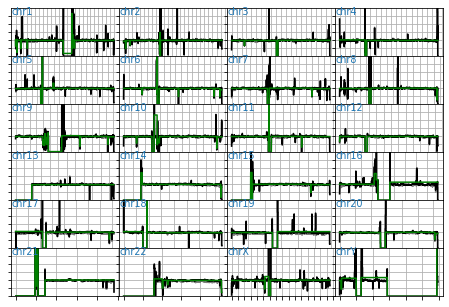

<Figure size 432x288 with 0 Axes>

In [ ]:
import cnvpytor
pytor_file = "NA12877.pytor"

view = cnvpytor.Viewer([pytor_file],params={"bin_size":100000})

view.rd()

###  4.4 Single Sample: Region Wide

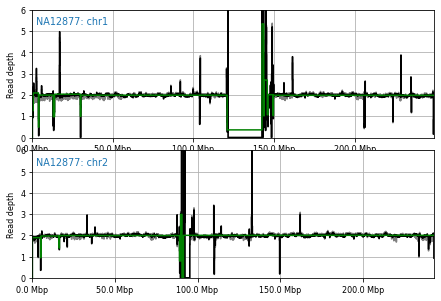

<Figure size 432x288 with 0 Axes>

In [ ]:
view.panels=['rd']
view.multiple_regions(['chr1', 'chr2'])


###  4.4 Single Sample: Multiple panel at once

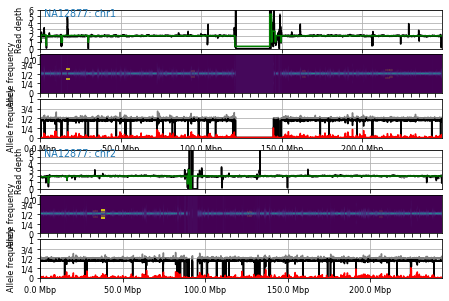

<Figure size 432x288 with 0 Axes>

In [ ]:
view.panels=['rd', 'likelihood']
view.multiple_regions(['chr1', 'chr2'])

### 4.5 Read Depth; Manhattan Plot


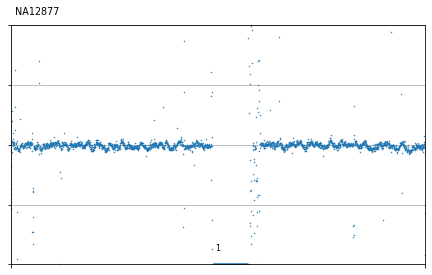

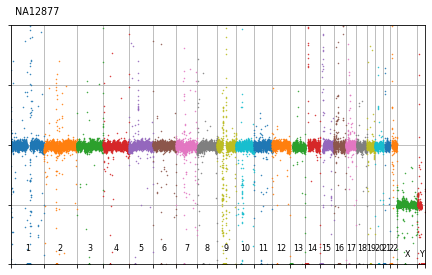

<Figure size 432x288 with 0 Axes>

In [ ]:
# Single Sample
view.markersize=1
view.manhattan()


# multiple sample
view.chrom=[]
view.markersize=1
view.manhattan()

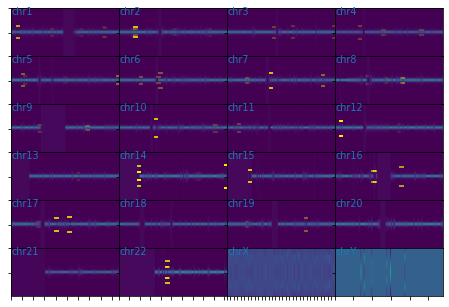

<Figure size 432x288 with 0 Axes>

In [ ]:
view.likelihood()

## 5. Export CNVpytor results

CNVpytor results can be exported to visualize in Jbrowse Genome browser.  

In [ ]:
# Install Dependency
!pip install pybigwig

In [ ]:
# cnvpytor -root [pytor files] -export jbrowse

!cnvpytor -root NA12877.pytor -export jbrowse

2020-07-22 04:06:04,746 - cnvpytor.export - INFO - CNVpytor data exporting for JBrowse view in jbrowse_NA12877
2020-07-22 04:06:04,748 - cnvpytor.export - INFO - JBrowse export: RD related data for NA12877
2020-07-22 04:06:04,750 - cnvpytor.export - INFO - JBrowse export: RD signal RD
2020-07-22 04:06:04,811 - cnvpytor.export - INFO - JBrowse export: RD signal RD partition
2020-07-22 04:06:04,828 - cnvpytor.export - INFO - JBrowse export: RD signal RD call
2020-07-22 04:06:04,845 - cnvpytor.export - INFO - JBrowse export: SNP related data for NA12877
2020-07-22 04:06:04,848 - cnvpytor.export - INFO - JBrowse export: SNP signal SNP baf
2020-07-22 04:06:04,872 - cnvpytor.export - INFO - JBrowse export: SNP signal SNP i1
2020-07-22 04:06:04,916 - cnvpytor.export - INFO - JBrowse export: complete
2020-07-22 04:06:04,916 - cnvpytor.export - INFO - Copy this directory to jbrowse directory if export path is not set to JBrowse path, To access this via localhost: http://localhost/jbrowse/?data=

In [ ]:
#Download the exported directory
#two step:
#1. zip it
!zip -r /content/jbrowse_NA12877.zip /content/jbrowse_NA12877

  adding: content/jbrowse_NA12877/ (stored 0%)
  adding: content/jbrowse_NA12877/seq/ (stored 0%)
  adding: content/jbrowse_NA12877/seq/refSeqs.json (deflated 84%)
  adding: content/jbrowse_NA12877/trackList.json (deflated 82%)
  adding: content/jbrowse_NA12877/bw/ (stored 0%)
  adding: content/jbrowse_NA12877/bw/NA12877/ (stored 0%)
  adding: content/jbrowse_NA12877/bw/NA12877/his_rd_p_100000_GC.bw (deflated 1%)
  adding: content/jbrowse_NA12877/bw/NA12877/snp_i1_100000_mask_offset0.5.bw (deflated 5%)
  adding: content/jbrowse_NA12877/bw/NA12877/his_rd_p_100000_partition_GC.bw (deflated 11%)
  adding: content/jbrowse_NA12877/bw/NA12877/his_rd_p_100000_partition_GC_merge.bw (deflated 33%)
  adding: content/jbrowse_NA12877/bw/NA12877/snp_i1_100000_mask_offset-0.5.bw (deflated 5%)
  adding: content/jbrowse_NA12877/bw/NA12877/snp_baf_100000_mask.bw (deflated 1%)
  adding: content/jbrowse_NA12877/bw/NA12877/his_rd_p_100000.bw (deflated 2%)


In [ ]:
from google.colab import files
files.download("/content/jbrowse_NA12877.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>